## Introdução

O aprendizado de machine learning não supervisionado é um tipo de aprendizado onde o modelo trabalha com dados sem rótulos ou classificações pré-definidas. O objetivo é identificar padrões ocultos ou estruturas subjacentes nos dados, sem orientação explícita sobre o que procurar. Exemplos comuns de métodos de aprendizado não supervisionado incluem **clusterização**, como o algoritmo K-means, e **redução de dimensionalidade**, como a Análise de Componentes Principais (PCA). Este tipo de aprendizado é útil para explorar dados desconhecidos e descobrir novas informações.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')

## K-Means Clustering

O **K-means** é um algoritmo de aprendizado não supervisionado amplamente utilizado para **clusterização**. Ele organiza um conjunto de dados em grupos, ou **clusters**, de forma que os elementos em cada cluster sejam mais semelhantes entre si do que com os de outros clusters. O número de clusters $ k $ é definido pelo usuário antes da execução do algoritmo.

### Como o K-means funciona:
1. **Inicialização**: 
   - Escolhem-se aleatoriamente $ k $ pontos de dados iniciais, que serão os **centróides** dos clusters.
   
2. **Atribuição de clusters**: 
   - Cada ponto do conjunto de dados é atribuído ao cluster cujo centróide está mais próximo (medido normalmente pela distância euclidiana).

3. **Atualização dos centróides**:
   - Após atribuir todos os pontos aos clusters, recalcula-se o centróide de cada cluster como a média dos pontos que foram atribuídos a ele.

4. **Repetição**:
   - Os passos 2 e 3 são repetidos até que os centróides não mudem significativamente entre as iterações, ou até que um número máximo de iterações seja atingido.

### Características do K-means:
- **Simples e eficiente**: O K-means é fácil de implementar e rápido em dados menores ou moderados, o que o torna uma escolha popular para muitas tarefas de clusterização.
- **Número de clusters pré-definido**: Um dos desafios do K-means é que o número de clusters $ k $ precisa ser especificado antes, e pode ser difícil determinar o valor correto. Métodos como o **método do cotovelo** ou o **coeficiente de silhueta** podem ajudar.
- **Clusters esféricos**: O K-means tende a formar clusters esféricos e de tamanho similar, o que pode ser uma limitação quando os dados têm formas de clusters mais complexas.

### Limitações:
- **Sensível a valores iniciais**: Como os centróides são escolhidos aleatoriamente no início, o K-means pode convergir para soluções diferentes dependendo das escolhas iniciais. Isso pode ser resolvido rodando o algoritmo várias vezes com diferentes inicializações.
- **Não é adequado para clusters não esféricos**: O K-means funciona bem em dados que formam clusters esféricos, mas pode falhar em identificar clusters de formas mais complexas.
- **Afetado por outliers**: O K-means é sensível a outliers, pois eles podem distorcer os centróides.

Apesar dessas limitações, o K-means é uma ferramenta poderosa e amplamente utilizada em várias áreas, como segmentação de clientes, compressão de imagens e análise de padrões.

In [3]:
#criando dados sintéticos
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=[2, 1, 1, 2], random_state=101)

#nosso data é uma tupla contendo os valores dispostos em 200 linhas por 2 colunas em data[0] e as classes desses valores em data[1].
data

(array([[-6.71419265e+00,  1.03932125e+01],
        [ 4.90728366e+00,  5.85747409e+00],
        [-4.54340700e-01,  3.46993806e+00],
        [ 2.85067973e+00,  8.28075279e+00],
        [ 4.47750967e+00,  6.97215388e+00],
        [-1.02351670e+01, -6.31601883e+00],
        [ 2.77693736e+00,  8.39388742e+00],
        [-1.94531663e+00,  1.41408470e+00],
        [ 2.29641395e+00,  7.54884427e+00],
        [-1.53850188e+00,  3.32346476e+00],
        [-6.44379397e+00,  9.87426599e+00],
        [-1.36818141e+00,  2.62528244e+00],
        [ 3.25966685e+00,  7.36381102e+00],
        [ 2.97607330e+00,  5.95782750e+00],
        [-5.43264879e+00,  9.83460048e+00],
        [-6.66235492e-01, -9.47876647e-02],
        [ 4.96544332e+00,  6.23003890e+00],
        [-2.60705549e+00,  4.25161021e-01],
        [-9.82160444e+00, -4.82608993e+00],
        [-4.61639859e+00,  1.17831014e+01],
        [-9.97777536e+00, -6.07283992e+00],
        [ 7.02221598e-01, -5.23385577e-02],
        [ 2.31311946e+00,  3.797

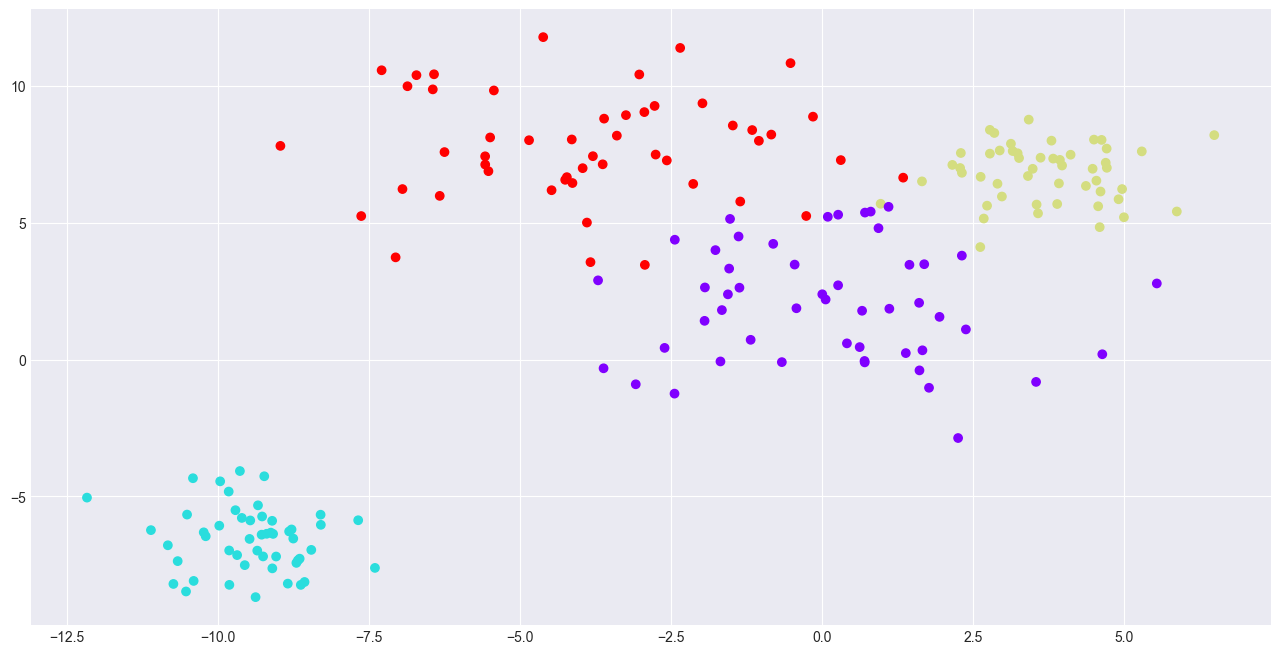

In [4]:
#visualizando os dados
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

In [5]:
#importando o modélo K-Means
from sklearn.cluster import KMeans

In [6]:
#instanciando o modélo K-Means
kmeans = KMeans(n_clusters=4)

#treinando o modelo
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [7]:
#visualizando os pontos centrais dos clusters
kmeans.cluster_centers_

array([[-0.31922142,  1.65750485],
       [-9.45212819, -6.56470497],
       [-4.26532727,  8.04228496],
       [ 3.22962915,  6.57426507]])

In [8]:
#visualizando as labels do modélo
kmeans.labels_

array([2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       3, 1, 2, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       0, 3, 2, 0, 1, 3, 0, 2, 3, 0, 1, 2, 3, 0, 2, 3, 1, 3, 1, 2, 3, 0,
       1, 3, 3, 1, 3, 3, 1, 0, 1, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 2,
       3, 1, 1, 1, 1, 0, 3, 1, 3, 2, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 3, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 3, 0, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3,
       0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 3, 3, 2,
       3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 3, 2, 1, 3, 3, 3,
       1, 0])

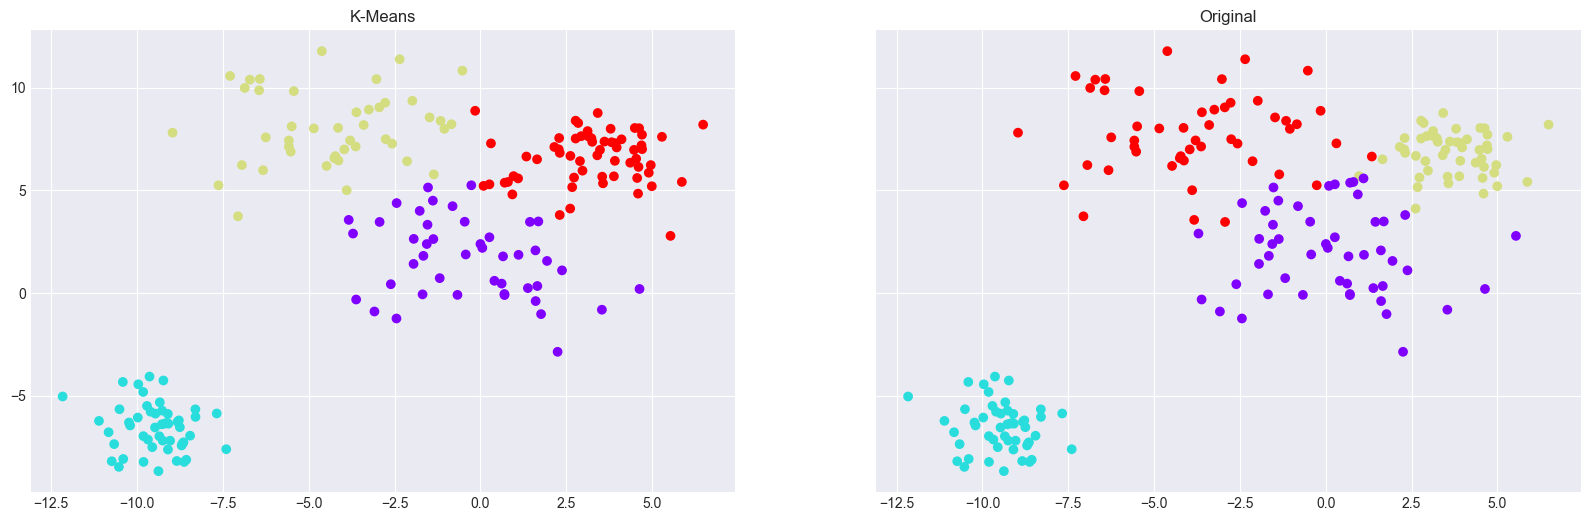

In [9]:
#plotando as labels do modélo X as labels reais
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 6))
ax1.set_title('K-Means')
ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')


## Método do cotovelo

O **método do cotovelo** é uma técnica usada para determinar o número ideal de clusters (ou centróides) em um modelo K-means. A ideia é rodar o algoritmo K-means para diferentes valores de $ k $ (número de clusters) e calcular uma métrica chamada **soma das distâncias quadráticas dentro do cluster** ou **inércia**, que representa o quanto os dados estão próximos dos seus respectivos centróides.

### Passos do método do cotovelo:

1. **Executar K-means para vários valores de $ k $**: 
   - Você treina o modelo com diferentes valores de $ k $ (geralmente de 1 a um valor máximo escolhido, por exemplo, 10 ou 15).
   
2. **Calcular a inércia (dentro do cluster)**: 
   - Para cada valor de $ k $, calcula-se a soma das distâncias quadráticas entre os pontos de dados e os seus centróides. Quanto menor essa soma, melhor o agrupamento.
   
3. **Plotar a inércia em função de $ k $**:
   - A inércia será alta para valores pequenos de $ k $ e diminuirá conforme $ k $ aumenta. Isso porque mais clusters permitem que os dados sejam agrupados de forma mais precisa.
   
4. **Identificar o ponto de cotovelo**:
   - O "cotovelo" é o ponto onde a redução na inércia diminui drasticamente ao aumentar $ k $. Este ponto indica o número ideal de clusters, pois depois do cotovelo, aumentar $ k $ não traz uma grande melhoria no agrupamento.

### Exemplo em Python:

Vamos treinar modelos de K-Means com diferentes valores de $ k $ sobre o conjunto de dados que usamos anteriormente:

Text(0.5, 1.0, 'Método do Cotovelo')

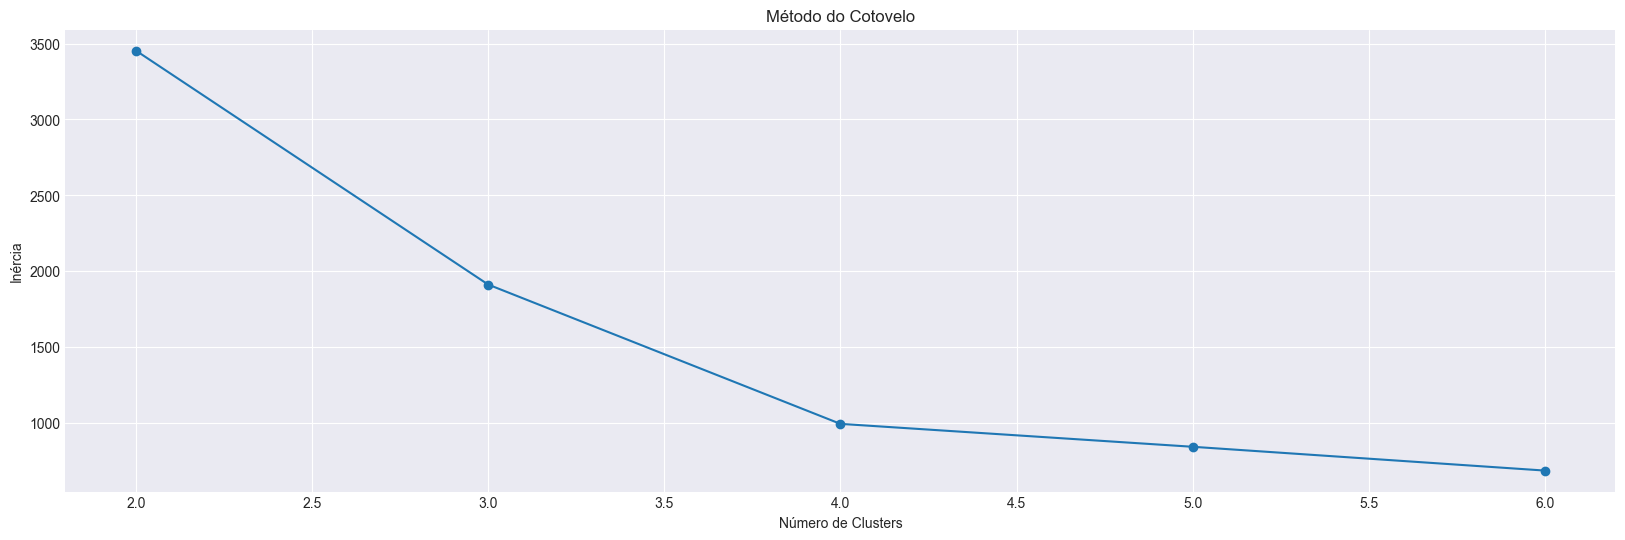

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))

list_inertia = []
linst_k = []
for k in [2, 3, 4, 5, 6] :
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data[0])

  list_inertia.append(kmeans.inertia_)
  linst_k.append(k)

#plotando o cotovelo
ax.plot(linst_k, list_inertia, marker='o')
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('Inércia')
ax.set_title('Método do Cotovelo')


### Interpretação:
- O ponto no gráfico onde a curva começa a se achatar forma o "cotovelo". Esse valor de $ k $ representa o número ideal de clusters. É aqui que o modelo equilibra bem a simplicidade (menos clusters) com a precisão (baixa inércia).

Esse método é intuitivo e visual, mas não é sempre preciso. Em alguns casos, o "cotovelo" pode não ser claro, então pode ser interessante combinar com outras técnicas, como o **coeficiente de silhueta**.

## **Mixture Models**

Mixture Models, ou *Modelos de Mistura*, são uma abordagem de aprendizado de máquina não supervisionado que busca modelar a distribuição dos dados como uma combinação de várias distribuições subjacentes. Diferente do K-Means, que agrupa os dados atribuindo cada ponto a um único cluster baseado na proximidade ao centroide, os Mixture Models tratam cada ponto de dados como tendo uma probabilidade de pertencer a diferentes clusters. Um dos métodos mais comuns nessa categoria é o *Gaussian Mixture Model* (GMM).

### 1. **Fundamento Básico**
Mixture Models são usados para representar dados que se acreditam serem gerados por uma combinação de várias distribuições. O modelo assume que:
- Existem $ K $ componentes (ou clusters) que descrevem os dados.
- Cada componente é descrito por uma distribuição probabilística (ex.: distribuição Gaussiana).
- Cada dado é gerado a partir de uma dessas distribuições, mas você não sabe de qual.

### 2. **Gaussian Mixture Models (GMM)**
Os GMMs são uma aplicação específica onde cada componente é uma distribuição Gaussiana (ou normal). Um GMM pode ser pensado como uma combinação de múltiplas distribuições Gaussianas. Os parâmetros de um GMM incluem:
- **Média ($ \mu_k $)**: Centro da distribuição para cada componente.
- **Variância ($ \Sigma_k $)**: A forma da distribuição para cada componente.
- **Pesos ($ \pi_k $)**: Representam a proporção de cada componente no total de dados (e somam 1).

### 3. **Modelo de Mistura**
Matematicamente, a função de densidade de probabilidade de um GMM para um dado ponto $ x $ é expressa como:
$$
p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x | \mu_k, \Sigma_k)
$$
Onde:
- $ \mathcal{N}(x | \mu_k, \Sigma_k) $ é a função de densidade da distribuição Gaussiana.
- $ \pi_k $ é o peso que representa a probabilidade de um dado ser gerado pela $ k $-ésima Gaussiana.

### 4. **Algoritmo Expectation-Maximization (EM)**
Para ajustar um GMM aos dados, utiliza-se o algoritmo *Expectation-Maximization (EM)*, que possui duas etapas principais:
1. **Etapa E (Expectation)**: Estima a probabilidade de cada dado pertencer a cada componente (cluster) dado os parâmetros atuais. É como determinar uma "responsabilidade" parcial de cada cluster sobre cada ponto de dados.
2. **Etapa M (Maximization)**: Atualiza os parâmetros ($ \mu_k $, $ \Sigma_k $, $ \pi_k $) para maximizar a probabilidade dos dados dado as responsabilidades estimadas na etapa anterior.

O algoritmo alterna entre essas duas etapas até que os parâmetros converjam.

### 5. **Vantagens sobre K-Means**
- **Soft Clustering**: Em vez de atribuir um dado a um único cluster (como no K-Means), o GMM permite que um dado tenha probabilidades de pertencer a diferentes clusters.
- **Modelagem de Forma e Tamanho**: K-Means assume que os clusters são esféricos (iguais em tamanho e forma), enquanto o GMM permite clusters de formas e tamanhos variados, graças às covariâncias.

### 6. **Desvantagens e Limitações**
- **Complexidade Computacional**: Comparado ao K-Means, o EM é mais demorado e requer mais recursos.
- **Número de Componentes**: Assim como no K-Means, é necessário definir $ K $ (número de componentes) a priori.
- **Sensível a Inicializações**: A performance pode variar dependendo dos valores iniciais de $ \mu $, $ \Sigma $ e $ \pi $.

Os Mixture Models, especialmente os GMMs, são úteis quando os dados parecem ser formados por várias subpopulações e permitem uma abordagem mais flexível e probabilística para agrupar dados em comparação ao K-Means.

## **Gaussian Mixture Models (GMM)**

In [11]:
from sklearn.datasets import make_gaussian_quantiles

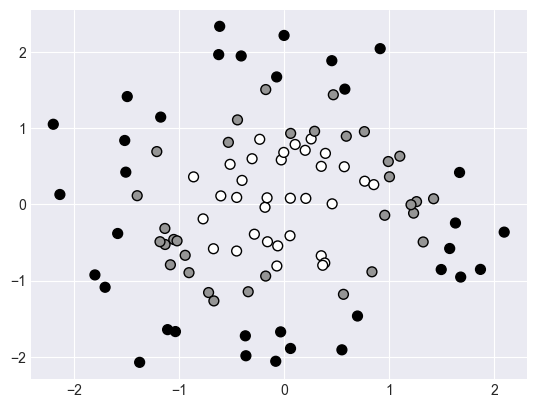

In [12]:
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', s=50, c=Y1, edgecolors='k')

In [42]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)

gmm.fit(X1)

GaussianMixture(n_components=3)

In [47]:
from matplotlib.patches import Ellipse

# Função para desenhar elipses que representam a distribuição de covariância dos componentes de uma GMM
def draw_ellipse(position, covariance, **kwargs):
    # Obtém o eixo atual do gráfico
    ax = plt.gca()

    # Decomposição da matriz de covariância usando SVD (Singular Value Decomposition)
    # U: matriz de vetores próprios (direções principais)
    # s: autovalores (variâncias nas direções principais)
    # Vt: transposta da matriz de vetores próprios (não usada diretamente)
    U, s, Vt = np.linalg.svd(covariance)

    # Calcula o ângulo de rotação da elipse a partir dos vetores próprios
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))

    # Largura e altura da elipse são proporcionais às raízes quadradas dos autovalores
    width, height = 2 * np.sqrt(s)

    # Desenha múltiplas elipses com diferentes tamanhos (nsig representa múltiplos do desvio padrão)
    for nsig in range(1, 4):
        # Adiciona uma elipse ao gráfico com as proporções calculadas
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))

# Função para visualizar as predições do modelo GMM (Gaussian Mixture Model)
def plot_gmm(gmm, X):
    # Cria uma figura e eixos para o gráfico com tamanho definido
    fig, ax = plt.subplots(figsize=(20, 8))

    # Prediz as classes dos pontos de dados X com base no modelo GMM
    labels = gmm.predict(X)

    # Desenha os pontos no gráfico, coloridos de acordo com suas classes preditas
    # 'viridis' é o mapa de cores usado, e 'zorder' define a ordem de sobreposição
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # Fator de ajuste para a transparência (alpha) das elipses, baseado no peso de cada componente do GMM
    w_factor = 0.2 / gmm.weights_.max()  # O fator é ajustado para que o componente com maior peso tenha alpha 0.2

    # Para cada componente do GMM (definido pelas médias, covariâncias e pesos)
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        # Desenha uma elipse para cada componente, com a opacidade ajustada pelo peso
        draw_ellipse(pos, covar, alpha=w * w_factor)


### Explicações adicionais do código acima:
1. **`draw_ellipse`**:
   - **Covariância**: A matriz de covariância captura a forma e a orientação da elipse que representa a distribuição gaussiana de cada componente do modelo GMM.
   - **Decomposição SVD**: Essa decomposição nos dá os vetores próprios (direções principais da elipse) e os autovalores (que são usados para calcular a largura e altura da elipse).
   - **`nsig`**: Multiplica a largura e a altura da elipse por 1, 2 e 3, desenhando elipses que correspondem a 1, 2 e 3 desvios padrões em torno do centro (média).

2. **`plot_gmm`**:
   - **Predição das classes (`gmm.predict`)**: O modelo GMM prevê a qual componente cada ponto nos dados pertence.
   - **Peso (`weights_`)**: Cada componente do GMM tem um peso associado, que reflete a proporção de pontos que pertence a ele. Isso é utilizado para ajustar a transparência das elipses.
   - **Elipses e transparência**: Componentes com maior peso são desenhados com elipses mais opacas, enquanto componentes menores aparecem mais transparentes.

Esses comentários devem ajudar a entender melhor o que cada parte do código faz e como ele funciona.

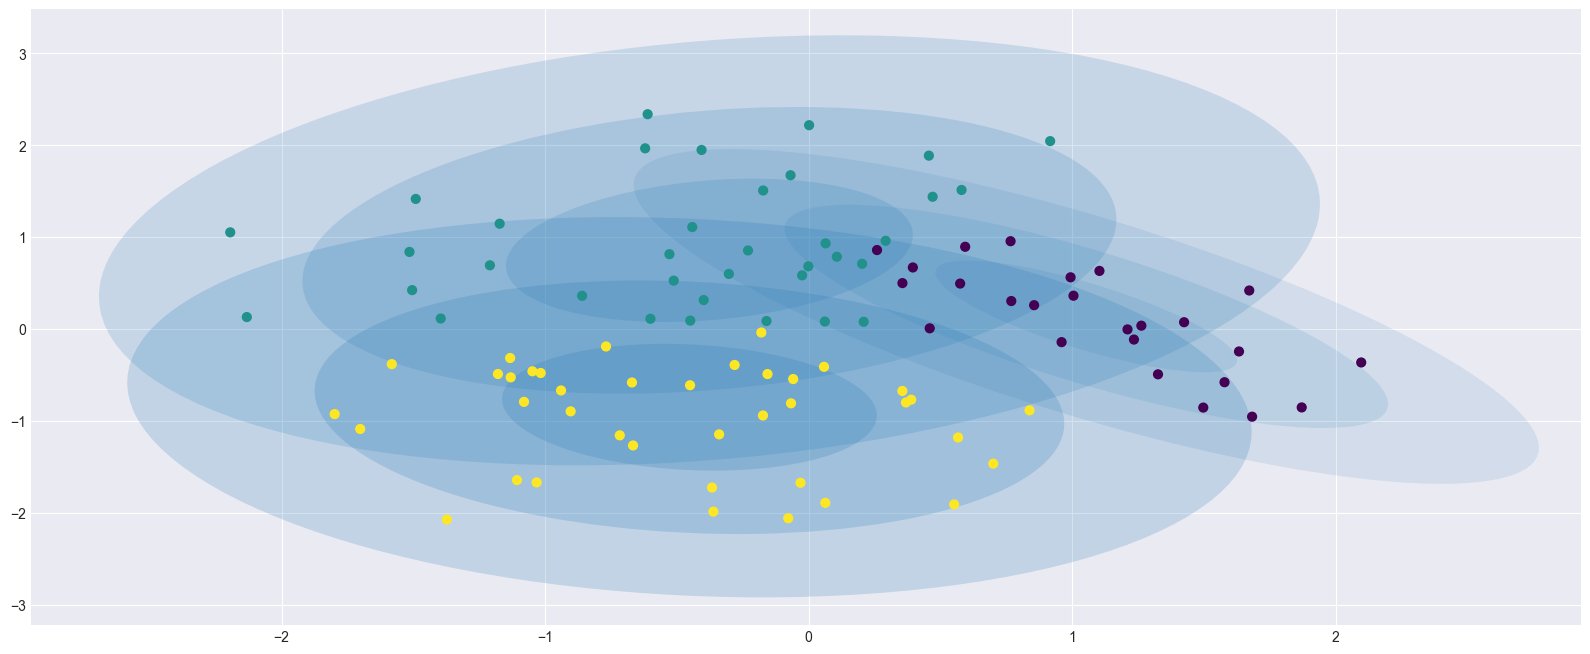

In [48]:
plot_gmm(gmm, X1)

A imagem que foi gerada pela função `plot_gmm` visualiza os dados e os componentes do modelo GMM (Gaussian Mixture Model) como elipses. Vamos explicá-la em detalhes:

1. **Pontos coloridos**: 
   - Cada ponto no gráfico representa uma amostra dos dados de entrada (`X`).
   - Eles são coloridos de acordo com o componente da GMM ao qual o modelo atribuiu cada ponto. As diferentes cores indicam diferentes classes ou componentes gaussianos. No caso, há três componentes (clusters) distintos.

2. **Elipses azuis**:
   - As elipses representam as distribuições de covariância de cada componente da GMM. 
   - Cada conjunto de elipses concêntricas (geralmente 3 para cada componente) corresponde a 1, 2 e 3 desvios-padrão em torno da média de cada componente. Essas elipses mostram a região de maior probabilidade para cada componente.
   - A forma e a orientação das elipses são determinadas pelas matrizes de covariância do modelo. Elipses alongadas indicam correlações entre as variáveis, enquanto elipses circulares indicam covariâncias aproximadamente iguais em ambas as direções.

3. **Transparência das elipses**:
   - A opacidade (ou transparência) das elipses reflete o peso de cada componente no modelo GMM. Componentes com pesos maiores têm elipses mais opacas, enquanto componentes com pesos menores aparecem mais transparentes.

4. **Dispersão dos pontos**:
   - Os pontos estão dispersos em torno das elipses, o que reflete a maneira como o modelo GMM ajusta as distribuições gaussianas aos dados. Os pontos mais próximos do centro de uma elipse têm maior probabilidade de pertencer a esse componente.

### Em resumo:
- O gráfico está visualizando a classificação dos dados em diferentes clusters usando o GMM, com elipses que mostram as regiões de maior densidade para cada componente gaussiano. A disposição e forma das elipses indicam a extensão e a correlação dos dados em cada cluster.